In [1]:
%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import numpy as np
import numpy.ma as ma
from math import sqrt 

In [2]:
data = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120324T214125Z_SEQ400-SubSurface_FV01_SEQ400-SubSurface-120325-Workhorse-ADCP-110_END-20130606T215200Z_C-20131119T020507Z.nc"
ADCP400 = Dataset(data)

In [6]:
LAT = ADCP400.variables['LATITUDE']
LON = ADCP400.variables['LONGITUDE']
TIMES = ADCP400.variables['TIME']
DEPTH = ADCP400.variables['DEPTH']
V = ADCP400.variables['VCUR']
U = ADCP400.variables['UCUR']
W = ADCP400.variables['WCUR']
Wheight = ADCP400.variables['HEIGHT_ABOVE_SENSOR']


#quality control
hasqc = ADCP400.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqc = ADCP400.variables['VCUR_quality_control']
Uqc = ADCP400.variables['UCUR_quality_control']
Dqc = ADCP400.variables['DEPTH_quality_control']
tqc = ADCP400.variables['TIME_quality_control']

In [4]:
units = ADCP400.variables['TIME'].units
calendar = ADCP400.variables['TIME'].calendar
times = num2date(ADCP400.variables['TIME'][:], units=units, calendar=calendar)

In [5]:
#block 5: Creat variable with ADCP dataset 

#For the basic data
dph = DEPTH[:,0,0]
latData =  LAT[:]      
lonData = LON[:]       
Wcolumn = Wheight[:]   
data_u = U [:,:,:,:]
data_v = V [:,:,:,:]
v2d = data_v[:,:,0,0]
u2d = data_u[:,:,0,0]


#For the quality controle data 
hasqc1 = hasqc[:]
Vqc1 = Vqc[:,:,0,0]
Uqc1 = Uqc[:,:,0,0]
Dqc1 = Dqc[:,0,0]

In [7]:
#block 6: Mask the wrong values and creat a new variable with the good values.
hasqc2 = ma.masked_where (hasqc1 != 4, Wcolumn)
Dqc2 = ma.masked_where (Dqc1 != 1, dph)
Vqc2 = ma.masked_where (Vqc1 != 1,v2d)
Uqc2 = ma.masked_where (Uqc1 != 1,u2d )

In [8]:
#block 6: reshape the depth of the mooring(dph) and the depth above the sensor(Wcolumn) for have the same shape.

dph14=np.kron(np.ones((14,1)),Dqc2) # repeated the dph 14 times to match size of v2d.
dph14f = ma.masked_where (dph14 < 0,dph14)
Wtime=np.kron(np.ones((20833,1)),hasqc2)

In [9]:
#block 7: Creation of the real depth variable.

DepthReal = dph14f-Wtime.T

In [25]:
depthBin = np.array([5,15,25,35,45,55,65,75,85,95])
depthBin2 = np.array([40,60,80,100,120,140,160,180,200])

In [40]:
Vresult = [ ]
for i in range(20,200,20):
   
    vi= Vqc2[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Vresult.append(( np.mean(vi)))

(10729,)
-0.23978257226387018
(16181,)
-0.35445775077498387
(22200,)
-0.45569612449998315
(25301,)
-0.5081494390398267
(25686,)
-0.5045424822540149
(17763,)
-0.6455696563710335
(12955,)
-0.6945459872753655
(6858,)
-0.7563330806902985
(1697,)
-0.7874061321390087


(-0.2, -0.8)

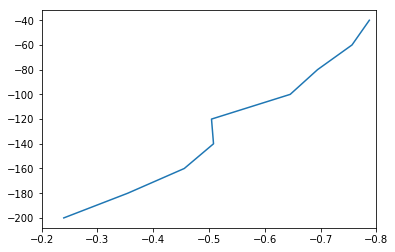

In [42]:
Vresult2 = Vresult[::-1]
plt.plot(Vresult2,-depthBin2)
plt.xlim(-0.2,-0.8)

In [44]:
Uresult = [ ]
for i in range(20,200,20):   
    vi= Uqc2[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Uresult.append(( np.mean(vi)))

(10729,)
-0.06340503127105795
(16181,)
-0.07268820638050844
(22200,)
-0.08722840262013064
(25301,)
-0.07535395038340706
(25686,)
-0.06753741870039223
(17763,)
-0.06559802044537143
(12955,)
-0.04484819543589198
(6858,)
-0.019649592312899502
(1697,)
-0.02221072770626609


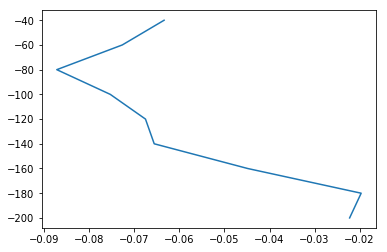

In [48]:
#Uresult2 = Uresult[::-1]
plt.plot(Uresult,-depthBin2)
#plt.xlim(-0.2,-0.8)

In [49]:
Speed = (Uqc2*Uqc2) + (Vqc2*Vqc2)
Speedf = np.sqrt(Speed) 

/home/z3525831/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [50]:
Speedfm = [ ]
for i in range(20,200,20): 
   
    vi= Speedf [np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Speedfm.append(( np.mean(vi)))

(10729,)
0.39645664869721475
(16181,)
0.47722314493638796
(22200,)
0.5582944255502296
(25301,)
0.5918435673086961
(25686,)
0.5715315421506919
(17763,)
0.6760637942090779
(12955,)
0.708308934712998
(6858,)
0.7612124977474135
(1697,)
0.7912989941593331


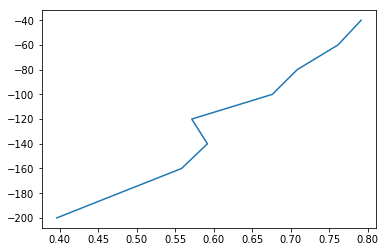

In [51]:
Speedfm2 = Speedfm[::-1]
plt.plot(Speedfm2,-depthBin2)

In [52]:
P = 0.5 * 1025 * 4 * (Speedf*Speedf*Speedf)     
Pf = P/1000

In [53]:
Pfm = [ ]
for i in range(20,200,20):
   
    vi= Pf[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Pfm.append(( np.mean(vi)))

(10729,)
0.2842987965380728
(16181,)
0.4547087742434544
(22200,)
0.7119801248565353
(25301,)
0.7741339086478234
(25686,)
0.6795064876978526
(17763,)
0.7879074396318883
(12955,)
0.822427876733592
(6858,)
0.9706279283624492
(1697,)
1.0553973552367697


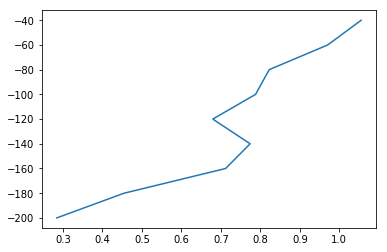

In [54]:
Pfm2 = Pfm[::-1]
plt.plot(Pfm2,-depthBin2)